In [1]:
! pip install wget
!pip install plotly 
!pip install folium

# Data Processing
import numpy as np
import pandas as pd
import wget
from datetime import datetime, timedelta

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import folium
%matplotlib inline
import matplotlib.colors as mcolors
from matplotlib import rcParams
import seaborn as sb
from matplotlib.cm import rainbow
plt.style.use('seaborn')

import random
import math
import time
import datetime
import operator

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display, HTML

# set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("Setup Complete")

Setup Complete


In [2]:
from google.colab import files
uploaded=files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global (5).csv
Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global (5).csv
Saving time_series_covid19_recovered_global.csv to time_series_covid19_recovered_global (5).csv


In [3]:
import io

In [4]:
confirmed_df=pd.read_csv(io.BytesIO(uploaded['time_series_covid19_confirmed_global.csv']))
death_df=pd.read_csv(io.BytesIO(uploaded['time_series_covid19_deaths_global.csv']))
recovered_df=pd.read_csv(io.BytesIO(uploaded['time_series_covid19_recovered_global.csv']))


In [5]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [6]:
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1239,1248,1261,1273,1282,1293,1302,1312,1322,1333,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,59,62,64,67,70,75,78,80,80,80,86,86,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154


In [7]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21901,22375,22802,23238,23667,24083,24506,24920,25263,25627,26004,26308,26644,27017,27347,27653,27971,28281,28587,28874,29142,29369,29587,29886,30157,30436,30717,30978,31244,31493,31746,32006,32259,32481,32745,32985,33183,33379,33562,33723,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,821,825,825,828,839,839,839,839,839,855,858,863,863,863,869,869,875,875,875,875,875,877,877,893,893,902,902,902,908,908,909,909,928,928,928,934,934,938,938,943,943,943,945,945,1054,1054,1164,1164,1164,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,476,503,506,520,544,564,567,569,575,577,577,584,628,628,632,667,698,742,804,814,818,877,977,977,1335,1028,1041,1063,1071,1084,1115,1144,1167,1192,1198,1215,1215,1245,1277,1288,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449


# Basic checks

In [8]:
print(type(confirmed_df))
print(type(death_df))
print(type(recovered_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [10]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [11]:
recovered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 490.3+ KB


In [12]:
print(confirmed_df.shape)
print(death_df.shape)
print(recovered_df.shape)

(266, 248)
(266, 248)
(253, 248)


In [13]:
confirmed_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.315789,45.255639,63.109023,74.763158,89.842105,103.921053,115.796992,129.304511,139.582707,150.973684,160.781955,168.458647,170.030075,226.996241,251.533835,259.586466,267.796992,275.447368,282.522556,284.402256,286.507519,288.872180,295.492481,296.921053,299.041353,302.248120,305.921053,311.033835,316.240602,323.357143,332.312030,339.744361,349.462406,358.165414,368.526316,383.526316,398.631579,413.507519,428.368421,...,6.871721e+04,6.968994e+04,7.070960e+04,7.178158e+04,7.283764e+04,7.381407e+04,7.465711e+04,7.551233e+04,7.647033e+04,7.751193e+04,7.858693e+04,7.973111e+04,8.066476e+04,8.146382e+04,8.224989e+04,8.321308e+04,8.424140e+04,8.524560e+04,8.626335e+04,8.726152e+04,8.803574e+04,8.888667e+04,8.979656e+04,9.087874e+04,9.192836e+04,9.298665e+04,9.397164e+04,9.482221e+04,9.580739e+04,9.680317e+04,9.786244e+04,9.889044e+04,1.000676e+05,1.010584e+05,1.018942e+05,1.027735e+05,1.036494e+05,1.047469e+05,1.058701e+05,1.070726e+05,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297673,443.366813,689.035590,832.953418,1026.582242,1209.754647,1359.927896,1534.122760,1665.831961,1820.905815,1949.402861,2049.809414,2050.149390,2958.034534,3337.708666,3450.661369,3569.103387,3679.809248,3783.531445,3804.941211,3830.105321,3843.654801,3930.735156,3930.773058,3943.282630,3973.896751,3998.654470,4024.279270,4044.748524,4072.596612,4109.799275,4124.652535,4137.003159,4148.418118,4162.503989,4179.704877,4197.036471,4213.444471,4232.875850,...,3.609416e+05,3.663504e+05,3.717965e+05,3.776100e+05,3.832570e+05,3.888223e+05,3.931862e+05,3.974734e+05,4.026420e+05,4.084647e+05,4.142181e+05,4.203601e+05,4.253771e+05,4.294794e+05,4.331231e+05,4.382516e+05,4.436425e+05,4.488150e+05,4.538117e+05,4.5916

In [14]:
death_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21.076624,22.829441,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,0.642857,0.800752,0.973684,1.360902,1.601504,1.849624,2.120301,2.383459,2.703008,3.030075,3.406015,3.808271,4.184211,4.203008,5.154135,5.725564,6.263158,6.654135,7.022556,7.548872,7.981203,8.451128,8.466165,9.244361,9.285714,9.887218,10.187970,10.417293,10.578947,10.800752,11.060150,11.263158,11.597744,11.879699,12.236842,12.586466,13.007519,13.379699,14.296992,14.988722,...,2591.736842,2617.857143,2643.992481,2668.372180,2692.063910,2712.402256,2729.469925,2748.018797,2772.146617,2796.988722,2820.421053,2858.518797,2878.627820,2894.372180,2909.909774,2935.748120,2961.124060,2983.774436,3004.601504,3025.515038,3040.030075,3056.383459,3080.436090,3104.060150,3126.187970,3146.917293,3167.112782,3181.778195,3197.500000,3221.860902,3244.466165,3265.913534,3288.116541,3306.680451,3320.823308,3355.812030,3373.620301,3397.315789,3419.093985,3441.187970,3459.515038,3473.206767,3489.860902,3514.481203,3536.109023,3556.620301,3578.071429,3597.740602,3611.635338,3622.906015
std,24.904600,70.191330,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,9.933187,12.507875,15.266540,21.458635,25.382490,29.367546,33.659009,37.889556,42.855331,47.821277,53.400027,59.714706,65.477808,65.477435,80.313740,89.326726,97.848816,103.979029,109.681320,117.774294,124.394608,131.443278,131.442536,143.826246,143.824897,152.959270,157.128101,160.316323,161.912728,164.429723,167.196473,169.291883,171.892990,173.898649,176.177420,178.202265,180.179512,182.094322,184.679238,186.977296,...,12556.816493,12678.052072,12807.355476,12925.181309,13038.583422,13136.028534,13196.246436,13265.112647,13377.125566,13505.154268,13616.104961,13756.009076,13848.485305,13911.189311,13970.410304,14099.020938,14223.641787,14333.459270,14439.353200,14536.177479,14589.871975,14647.283268,14767.488789,14883.862137,14989.567214,15085.383423,15178.861539,15232.231433,15294.847619,15411.197225,15521.992322,15622.650068,15723.199898,15806.544108,15860.914755,15913.901869,15981.316278,16099.587077,16202.430513,16314.668589,16398.950

In [15]:
recovered_df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,19.835137,27.997068,0.110672,0.118577,0.142292,0.154150,0.205534,0.241107,0.422925,0.498024,0.565217,0.877470,1.122530,1.865613,2.462451,3.367589,4.442688,5.877470,7.948617,10.339921,12.822134,15.596838,18.509881,20.355731,24.881423,31.849802,37.134387,42.944664,49.735178,56.727273,63.719368,71.845850,74.664032,90.458498,92.466403,99.711462,110.296443,120.094862,131.529644,145.102767,157.241107,168.837945,180.245059,190.624506,202.252964,212.632411,220.810277,230.667984,239.897233,247.007905,...,4.313439e+04,4.401081e+04,4.488646e+04,4.563400e+04,4.639497e+04,4.719015e+04,4.788864e+04,4.853960e+04,4.974495e+04,5.069887e+04,5.135247e+04,5.247759e+04,5.314562e+04,5.405877e+04,5.489447e+04,5.579625e+04,5.665579e+04,5.747657e+04,5.815119e+04,5.898094e+04,5.983245e+04,6.062316e+04,6.154387e+04,6.243062e+04,6.322731e+04,6.401950e+04,6.485596e+04,6.567982e+04,6.647603e+04,6.748315e+04,6.834733e+04,6.921970e+04,7.006457e+04,7.085848e+04,7.168897e+04,7.247475e+04,7.321894e+04,7.421630e+04,7.506871e+04,7.595178e+04,7.683461e+04,7.756891e+04,7.847586e+04,7.936355e+04,8.026853e+04,8.113512e+04,8.213040e+04,8.307036e+04,8.400322e+04,8.456361e+04
std,24.504550,67.358197,1.760345,1.764332,1.954723,2.020714,2.649732,2.852382,5.059859,5.566071,5.723862,8.965366,10.730686,18.737687,24.543684,33.234187,40.512413,52.353924,71.396899,92.314954,115.039106,142.186509,168.753592,173.039104,221.634660,303.958894,357.566163,421.564533,498.638310,578.156053,654.435905,745.897395,752.783139,966.865535,970.251872,1058.564980,1198.039408,1323.412019,1474.934197,1664.413409,1827.047667,1986.624227,2137.173434,2279.986046,2427.517660,2555.475220,2646.172517,2739.412882,2849.338313,2928.712756,...,1.902326e+05,1.947576e+05,1.991361e+05,2.030365e+05,2.071214e+05,2.115151e+05,2.151440e+05,2.185088e+05,2.242458e+05,2.296858e+05,2.327469e+05,2.395119e+05,2.422374e+05,2.460027e+05,2.507635e+05,2.559718e+05,2.609307e+05,2.655039e+05,2.686976e+05,2.737596e+05,2.776522e+05,2.818702e+05,2.871513e+05,2.924302e+05,2.968148e+05,3.

In [16]:
confirmed_df.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [17]:
death_df.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [18]:
recovered_df.isnull().sum()

Province/State    186
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

In [19]:
states=[]
for j in range(0,len(confirmed_df.Lat)):
    states.append(confirmed_df["Country/Region"][j])
final_states=np.unique(states).tolist()
print(final_states)
print(f"The total states are" ,{len(final_states)})

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indones

# Data Processing

## Merging Confirmed, Deaths and Recovered

In [20]:
dates = confirmed_df.columns[4:]
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

In [21]:
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)

death_df_long = death_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)

recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [22]:
confirmed_df_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [23]:
death_df_long.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [24]:
recovered_df_long.head() 

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [25]:
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

In [26]:
# Merging confirmed_df_long and death_df_long
full_table = confirmed_df_long.merge(
  right=death_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [27]:
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [28]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0.0


## Data Cleaning

In [29]:
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [30]:
full_table.isna().sum()

Province/State    45140
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths             5856
Recovered          4636
dtype: int64

In [31]:
full_table['Deaths'] = full_table['Deaths'].fillna(0).astype(int)
full_table['Recovered'] = full_table['Recovered'].fillna(0).astype(int)

In [32]:
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')

In [33]:
ship_df = full_table[ship_rows]
ship_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
41,Diamond Princess,Canada,0.0,0.0,2020-01-22,0,0,0
42,Grand Princess,Canada,0.0,0.0,2020-01-22,0,0,0
102,NaN,Diamond Princess,0.0,0.0,2020-01-22,0,0,0
168,NaN,MS Zaandam,0.0,0.0,2020-01-22,0,0,0
307,Diamond Princess,Canada,0.0,0.0,2020-01-23,0,0,0


In [34]:
full_table = full_table[~(ship_rows)]

## Data Aggregation

Adding additional columns for :

active cases : active = confirmed — deaths — recovered

In [35]:
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [36]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0


# Data Analysis and Visualization

## World Total and Country wise Total Data

In [37]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [38]:
# new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')

# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

In [39]:
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0,0,0


In [40]:
temp = full_grouped.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
world_cases = temp.to_numpy()
temp.style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered,Active
0,2020-09-21 00:00:00,31245063,889094,21259919,9096050


In [41]:
temp = full_grouped.groupby(['Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'].max()
temp.sort_values('Confirmed', ascending=False).style.bar(subset=['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'],
                                                         align = 'left', color='#d65f5f')

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Country/Region,,,,,,,
US,6856884,199865,2615949,4041070,77255,2609,103921
India,5487580,87882,4396399,1017754,97894,2003,95880
Brazil,4558040,137272,3993432,598313,69074,1595,140050
Russia,1105048,0,909026,252463,11656,0,12375
Colombia,770435,24397,640900,169326,15318,442,23868
Peru,768895,31369,607837,168092,21358,4143,18627
Mexico,700580,73697,596317,53350,9556,1092,10915
Spain,671468,0,150376,521092,31428,0,6399
South Africa,661936,15992,591208,173590,13944,572,24117


# # World Number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate

### Number of confirmed cases, active cases, deaths, recoveries

In [42]:
temp = full_grouped.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
                 var_name='Case', value_name='Count')

fig = px.line(temp, x="Date", y="Count", color='Case',
             title='Cases over time')
fig

In [43]:
fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Cases over time')
fig

In [44]:
fig = px.bar(temp, x="Date", y="Count", color='Case',
             title='Cases over time')
fig

In [45]:
temp = temp[~(temp.Case == 'Confirmed')]
fig = px.pie(temp, values='Count', names='Case', title= f'Confirmed Cases: {world_cases.item(1)}')
fig.update_traces(textinfo='percent+value+label')
fig.show()

### Recovery and Mortality Rate

In [46]:
temp = full_grouped
# adding two more columns
temp['Mortality Rate'] = round(temp['Deaths']/temp['Confirmed'], 3)
temp['Recovery Rate'] = round(temp['Recovered']/temp['Confirmed'], 3)

temp.groupby(['Country/Region'])['Mortality Rate', 'Recovery Rate' ].max().sort_values('Recovery Rate', ascending=False).style.background_gradient(cmap='Reds')

,Mortality Rate,Recovery Rate
Country/Region,,
Uganda,0.012000,1.002000
Laos,0.000000,1.000000
Belgium,0.164000,1.000000
Papua New Guinea,0.053000,1.000000
Finland,0.047000,1.000000
Grenada,0.000000,1.000000
Liechtenstein,0.024000,1.000000
Sri Lanka,0.037000,1.000000
Cambodia,0.000000,1.000000


In [47]:
temp = full_grouped.groupby('Date').sum().reset_index()

temp['Mortality Rate'] = round(temp['Deaths']/temp['Confirmed'], 3)
temp['Recovery Rate'] = round(temp['Recovered']/temp['Confirmed'], 3)

temp = temp.melt(id_vars='Date', value_vars=['Mortality Rate', 'Recovery Rate'], 
                 var_name='Ratio', value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, 
              title='Recovery and Mortality Rate Over The Time')
fig

In [48]:
fig = px.bar(temp, x="Date", y="Value", color='Ratio', log_y=True, 
              title='Recovery and Mortality Rate Over The Time')
fig

## World Daily Increases in confirmed cases, confirmed deaths, confirmed recoveries

In [49]:
temp = full_grouped.groupby('Date')['New cases', 'New deaths', 'New recovered'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['New cases', 'New deaths', 'New recovered'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.line(temp, x="Date", y="Count", color='Case',
             title='Daily Cases')
fig

In [50]:
fig = px.area(temp, x="Date", y="Count", color='Case',
             title='Daily Cases')
fig

In [51]:
fig = px.bar(temp, x="Date", y="Count", color='Case',
             title='Daily Cases')
fig

In [52]:
fig = px.pie(temp, values='Count', names='Case', title='Confirmed Cases')
fig.update_traces(textinfo='percent+value+label')
fig.show()

## World Log of cases over time, log of death over time, log of corona recoveries over time

In [53]:
temp = full_grouped.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
                 var_name='Case', value_name='Count')
temp['Log Count'] = np.log(temp['Count'])

fig = px.line(temp, x="Date", y="Log Count", color='Case',
             title='Log of Cases over time')
fig

In [54]:
fig = px.area(temp, x="Date", y="Log Count", color='Case',
             title='Log of Cases over time')
fig

In [55]:
fig = px.bar(temp, x="Date", y="Log Count", color='Case',
             title='Log of Cases over time')
fig

In [56]:
fig = px.pie(temp, values='Log Count', names='Case', title='Confirmed Cases')
fig.update_traces(textinfo='percent+label')
fig.show()

## Country specific Cases, death, recoveries graph :(Taking India as an Example)

In [57]:
def cdr_graph(df, region):
    """
    Input:
        df of type :
            * Date: datetime64[ns]
            * Country/Region: object
            * Confirmed: int64
            * Deaths: int64
            * Recovered: int64
            * Active: int64
            * New cases: int64
            * New deaths: int64
            * New recovered: int64
            * Mortality Rate: float64
            * Recovery Rate: float64<br>
            dtype: object
        region of df: String
    return:
        line, area, bar Graphs of ['Confirmed', 'Deaths', 'Recovered', 'Active'] cases 

    """
    temp = df.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
    temp = temp.melt(id_vars="Date", value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'],
                 var_name='Case', value_name='Count')

    line = px.line(temp, x="Date", y="Count", color='Case',
             title=f'{region} Cases over time')
    area = px.area(temp, x="Date", y="Count", color='Case',
             title=f'{region} Cases over time')
    bar = px.bar(temp, x="Date", y="Count", color='Case',
             title=f'{region} Cases over time')
    temp = temp[~(temp.Case == 'Confirmed')]
    pie = px.pie(temp, values='Count', names='Case', title='Confirmed Cases')
    pie.update_traces(textinfo='percent+label')
    
    display(line)
    display(area)
    display(bar)
    display(pie)

In [58]:
def mr_graph(df, region):
    """
    Input:
        df of type :
            * Date: datetime64[ns]
            * Country/Region: object
            * Confirmed: int64
            * Deaths: int64
            * Recovered: int64
            * Active: int64
            * New cases: int64
            * New deaths: int64
            * New recovered: int64
            * Mortality Rate: float64
            * Recovery Rate: float64<br>
            dtype: object
        region of df: String
    return:
        line, bar Graphs of ['Mortality Rate', 'Recovery Rate'] cases 

    """
    temp = df.groupby('Date').sum().reset_index()

    temp['Mortality Rate'] = round(temp['Deaths']/temp['Confirmed'], 3)
    temp['Recovery Rate'] = round(temp['Recovered']/temp['Confirmed'], 3)

    temp = temp.melt(id_vars='Date', value_vars=['Mortality Rate', 'Recovery Rate'], 
                     var_name='Ratio', value_name='Value')

    line = px.line(temp, x="Date", y="Value", color='Ratio', log_y=True, 
                  title=f'Recovery and Mortality Rate of {region} Over The Time')
    bar = px.bar(temp, x="Date", y="Value", color='Ratio', 
                 title=f'Recovery and Mortality of {region} Rate Over The Time')
    display(line)
    display(bar)

In [59]:
def daily_graph(df, region):
    """
    Input:
        df of type :
            * Date: datetime64[ns]
            * Country/Region: object
            * Confirmed: int64
            * Deaths: int64
            * Recovered: int64
            * Active: int64
            * New cases: int64
            * New deaths: int64
            * New recovered: int64
            * Mortality Rate: float64
            * Recovery Rate: float64<br>
            dtype: object
        region of df: String
    return:
        line, area, bar Graphs of ['New cases', 'New deaths', 'New recovered'] cases 

    """
    temp = df.groupby('Date')['New cases', 'New deaths', 'New recovered'].sum().reset_index()
    temp = temp.melt(id_vars="Date", value_vars=['New cases', 'New deaths', 'New recovered'],
                     var_name='Case', value_name='Count')

    line = px.line(temp, x="Date", y="Count", color='Case', title=f'{region} Daily Cases')
    area = px.area(temp, x="Date", y="Count", color='Case', title=f'{region} Daily Cases')
    bar = px.bar(temp, x="Date", y="Count", color='Case', title=f'{region} Daily Cases')
    pie = px.pie(temp, values='Count', names='Case', title='Confirmed Cases')
    pie.update_traces(textinfo='percent+label')
    
    display(line)
    display(area)
    display(bar)
    display(pie)

In [60]:
india_data = full_grouped[full_grouped['Country/Region'] == 'India']

In [61]:
cdr_graph(india_data, 'India')

In [62]:
mr_graph(india_data, 'India')

In [63]:
daily_graph(india_data, 'India')

### Similarly we can do for all other Countries.

## Country Specific Graphs (All Countries):

In [64]:
country_grouped = full_table.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [65]:
country_grouped['Active'] = country_grouped['Active'].astype(int)

In [66]:
country_grouped = country_grouped.sort_values('Confirmed', ascending=False)

In [67]:
others_series = pd.Series(np.sum(country_grouped[10:]))
country_grouped_others = country_grouped[:10]
country_grouped_others = country_grouped_others.append(others_series, ignore_index=True)
country_grouped_others.iloc[10,0] = 'Rest of the World'

In [68]:
# Confirmed Cases
fig = px.choropleth(country_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,700000], 
                    color_continuous_scale="aggrnyl", 
                    title='Countries with Confirmed Cases')
fig

In [69]:
fig = px.pie(country_grouped_others, values='Confirmed', names='Country/Region', title='Confirmed Cases')
fig.update_traces(textinfo='percent+label')
fig.show()

In [70]:
fig = px.bar(country_grouped.head(20).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="Country/Region",title='Confirmed Cases Top 20 Countries', 
             text='Confirmed', orientation='h', 
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

In [71]:
# Deaths
fig = px.choropleth(country_grouped[country_grouped['Deaths']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Deaths", hover_name="Country/Region", 
                    range_color=[1,50000], color_continuous_scale="agsunset",
                    title='Countries with Deaths Reported')
fig

In [72]:
fig = px.pie(country_grouped_others.sort_values('Deaths', ascending=False), values='Deaths', names='Country/Region', title='Total Deaths')
fig.update_traces(textinfo='percent+label')
fig.show()

In [73]:
fig = px.bar(country_grouped.sort_values('Deaths', ascending=False).head(20).sort_values('Deaths', ascending=True), 
             x="Deaths", y="Country/Region", title='Total Deaths Top 20 Countries', text='Deaths', orientation='h', 
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

In [74]:
# Recoveris
fig = px.choropleth(country_grouped[country_grouped['Recovered']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Recovered", hover_name="Country/Region", 
                    range_color=[1,50000], color_continuous_scale="agsunset",
                    title='Countries Recovered Cases')
fig

In [75]:
fig = px.pie(country_grouped_others.sort_values('Recovered', ascending=False), values='Recovered', names='Country/Region', title='Total Recovered')
fig.update_traces(textinfo='percent+label')
fig.show()

In [76]:
fig = px.bar(country_grouped.sort_values('Recovered', ascending=False).head(20).sort_values('Recovered', ascending=True), 
             x="Recovered", y="Country/Region", title='Total Recovered Top 20 Countries', text='Recovered', orientation='h', 
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

In [77]:
# Active
fig = px.choropleth(country_grouped[country_grouped['Active']>0], 
                    locations="Country/Region", locationmode='country names',
                    color="Active", hover_name="Country/Region", 
                    range_color=[1,50000], color_continuous_scale="agsunset",
                    title='Countries Active Cases')
fig

In [78]:
fig = px.pie(country_grouped_others.sort_values('Active', ascending=False), values='Active', names='Country/Region', title='Total Active Cases')
fig.update_traces(textinfo='percent+label')
fig.show()

In [79]:
fig = px.bar(country_grouped.sort_values('Active', ascending=False).head(20).sort_values('Active', ascending=True), 
             x="Active", y="Country/Region", title='Top 20 Countries Active Cases', text='Active', orientation='h', 
             width=700, height=700)
fig.update_traces(opacity=0.6)
fig

# Predictions

In [80]:
# import Packages for Prediction
!pip install pmdarima
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from datetime import timedelta

In [81]:
# change Date column name
full_grouped = full_grouped.rename(columns = {'Date': 'ds'})

# Group data
df_group = full_grouped.groupby(by = 'ds')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()

# change index to datetime
df_group.index = pd.to_datetime(df_group.index)

# Set frequncy of time series
df_group = df_group.asfreq(freq = '1D')

# Sort the values
df_group = df_group.sort_index(ascending = True)

# Fill NA values with zero
df_group = df_group.fillna(value = 0)

df_group = df_group.rename(columns = {'Date': 'ds'})

# Show the end of th data
display(df_group.tail())
display(df_group.head())

,Confirmed,Deaths,Recovered,Active
ds,,,,
2020-09-17,30174579,872607,20395618,8906354
2020-09-18,30498800,877976,20646629,8974195
2020-09-19,30780021,882908,20883978,9013135
2020-09-20,31021238,886407,21119368,9015463
2020-09-21,31245063,889094,21259919,9096050


,Confirmed,Deaths,Recovered,Active
ds,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,25,36,880
2020-01-25,1434,41,39,1354
2020-01-26,2118,54,52,2012


In [82]:
model_scores=[]

# AR Model

In [83]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()
model_scores=[]

In [84]:
model_ar_Confirmed = auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=15,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar_Confirmed.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5099.715, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5100.441, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5094.210, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5061.515, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=5031.390, Time=0.14 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=4950.826, Time=0.22 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0] intercept
Total fit time: 0.514 seconds


ARIMA(maxiter=50, method='lbfgs', order=(5, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [85]:
prediction_ar_Confirmed=model_ar_Confirmed.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar_Confirmed

In [86]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model Confirmed cases: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model Confirmed cases:  168138.5876598626


In [87]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases")
fig.show()

In [88]:
AR_model_Confirmed_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    AR_model_Confirmed_prediction.append(model_ar_Confirmed.predict(len(valid)+i)[-1])

In [89]:
pd.options.display.float_format = '{:.3f}'.format
model_AR_predictions_Confirmed=pd.DataFrame(zip(new_date,AR_model_Confirmed_prediction),columns=['Dates', 'AR_model_Confirmed_prediction'])
model_AR_predictions_Confirmed

,Dates,AR_model_Confirmed_prediction
0,2020-09-21,31036350.210
1,2020-09-22,31295617.478
2,2020-09-23,31574234.742
3,2020-09-24,31865142.178
4,2020-09-25,32155863.093
5,2020-09-26,32437284.982
6,2020-09-27,32706464.244
7,2020-09-28,32970715.008
8,2020-09-29,33242961.260
9,2020-09-30,33528614.106


## Prediction of Recoveries, Deaths for AR Model

### AR Model for Recoveries

In [90]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()
model_scores=[]

In [91]:
model_ar_Recovered = auto_arima(model_train["Recovered"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar_Recovered.fit(model_train["Recovered"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5389.185, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5304.804, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5282.325, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5278.721, Time=0.06 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=5271.980, Time=0.09 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=5254.548, Time=0.12 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0] intercept
Total fit time: 0.335 seconds


ARIMA(maxiter=50, method='lbfgs', order=(5, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [92]:
prediction_ar_Recovered=model_ar_Recovered.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar_Recovered

In [93]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Recovered"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model for Recoveries: ",np.sqrt(mean_squared_error(y_pred["Recovered"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model for Recoveries:  120885.02165151


In [94]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Recovered Cases",))
fig.update_layout(title="Recovered Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases")
fig.show()

In [95]:
AR_model_Recovered_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    AR_model_Recovered_prediction.append(model_ar_Recovered.predict(len(valid)+i)[-1])

In [96]:
pd.options.display.float_format = '{:.3f}'.format
model_AR_predictions_Recovered=pd.DataFrame(zip(new_date,AR_model_Recovered_prediction),
                               columns=['Dates', 'AR_model_Recovered_prediction'])
model_AR_predictions_Recovered

,Dates,AR_model_Recovered_prediction
0,2020-09-21,21123264.019
1,2020-09-22,21338276.800
2,2020-09-23,21554629.027
3,2020-09-24,21771725.792
4,2020-09-25,21989418.190
5,2020-09-26,22208190.733
6,2020-09-27,22427908.501
7,2020-09-28,22648460.035
8,2020-09-29,22870036.488
9,2020-09-30,23092434.942


### AR Model for Deaths

In [97]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()
model_scores=[]

In [98]:
model_ar_Deaths = auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar_Deaths.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3848.860, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3839.817, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3831.937, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3818.788, Time=0.09 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3803.614, Time=0.10 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3747.478, Time=0.16 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0] intercept
Total fit time: 0.450 seconds


ARIMA(maxiter=50, method='lbfgs', order=(5, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [99]:
prediction_ar_Deaths=model_ar_Deaths.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar_Deaths

In [100]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Deaths"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model for Deaths: ",np.sqrt(mean_squared_error(y_pred["Deaths"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model for Deaths:  4134.2126143747


In [101]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Train Data for Deaths Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Deaths"],
                    mode='lines+markers',name="Validation Data for Deaths Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["AR Model Prediction"],
                    mode='lines+markers',name="Prediction of Deaths Cases",))
fig.update_layout(title="Deaths Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Death Cases")
fig.show()

In [102]:
AR_model_Deaths_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    AR_model_Deaths_prediction.append(model_ar_Deaths.predict(len(valid)+i)[-1])

In [103]:
pd.options.display.float_format = '{:.3f}'.format
model_AR_predictions_Deaths=pd.DataFrame(zip(new_date,AR_model_Deaths_prediction),
                               columns=['Dates', 'AR_model_Deaths_prediction'])
model_AR_predictions_Deaths

,Dates,AR_model_Deaths_prediction
0,2020-09-21,898892.754
1,2020-09-22,904507.558
2,2020-09-23,910351.083
3,2020-09-24,915789.648
4,2020-09-25,921577.641
5,2020-09-26,927510.090
6,2020-09-27,933474.187
7,2020-09-28,939314.094
8,2020-09-29,945271.090
9,2020-09-30,951054.911


# MA Model

In [104]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()

In [105]:
model_ma_Confirmed= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)
model_ma_Confirmed.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5099.715, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5099.972, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5092.562, Time=0.11 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=5050.053, Time=0.39 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=5046.483, Time=0.37 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=5028.240, Time=0.32 sec

Best model:  ARIMA(0,2,5)(0,0,0)[0] intercept
Total fit time: 1.283 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 5), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [106]:
prediction_ma_Confirmed=model_ma_Confirmed.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma_Confirmed

In [107]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma_Confirmed)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma_Confirmed)))

Root Mean Square Error for MA Model:  391378.6183287388


In [108]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases")
fig.show()

In [109]:
MA_model_Confirmed_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    MA_model_Confirmed_prediction.append(model_ma_Confirmed.predict(len(valid)+i)[-1])

In [110]:
pd.options.display.float_format = '{:.3f}'.format
model_MA_Confirmed_predictions=pd.DataFrame(zip(new_date,MA_model_Confirmed_prediction),
                               columns=['Dates', 'MA_model_Confirmed_prediction'])
model_MA_Confirmed_predictions

,Dates,MA_model_Confirmed_prediction
0,2020-09-21,30653674.138
1,2020-09-22,30892453.751
2,2020-09-23,31132758.120
3,2020-09-24,31374587.245
4,2020-09-25,31617941.125
5,2020-09-26,31862819.761
6,2020-09-27,32109223.153
7,2020-09-28,32357151.301
8,2020-09-29,32606604.205
9,2020-09-30,32857581.865


## Prediction of Recoveries, Deaths for MA Model

### MA Model for Recoveries

In [111]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()

In [112]:
model_ma_Recovered= auto_arima(model_train["Recovered"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)
model_ma_Recovered.fit(model_train["Recovered"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5389.185, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5268.045, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5276.679, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=5308.880, Time=0.16 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=5318.095, Time=0.16 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=5295.285, Time=0.18 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 0.636 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [113]:
prediction_ma_Recovered=model_ma_Recovered.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma_Recovered

In [114]:
model_scores.append(np.sqrt(mean_squared_error(valid["Recovered"],prediction_ma_Recovered)))
print("Root Mean Square Error for MA Model for Recoveries: ",np.sqrt(mean_squared_error(valid["Recovered"],prediction_ma_Recovered)))

Root Mean Square Error for MA Model for Recoveries:  34634.98560087065


In [115]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Recovered Cases",))
fig.update_layout(title="Recovered Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases")
fig.show()

In [116]:
MA_model_recovered_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    MA_model_recovered_prediction.append(model_ma_Recovered.predict(len(valid)+i)[-1])

In [117]:
pd.options.display.float_format = '{:.3f}'.format
model_MA_predictions_Recovered=pd.DataFrame(zip(new_date,MA_model_recovered_prediction),
                               columns=['Dates', 'MA_model_recovered_prediction'])
model_MA_predictions_Recovered

,Dates,MA_model_recovered_prediction
0,2020-09-21,21347460.036
1,2020-09-22,21590235.727
2,2020-09-23,21835295.320
3,2020-09-24,22082638.812
4,2020-09-25,22332266.206
5,2020-09-26,22584177.500
6,2020-09-27,22838372.694
7,2020-09-28,23094851.790
8,2020-09-29,23353614.786
9,2020-09-30,23614661.682


### MA Model for Deaths

In [118]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()

In [119]:
model_ma_Deaths= auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=5,suppress_warnings=True,stepwise=False,seasonal=False)
model_ma_Deaths.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3848.860, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3814.388, Time=0.23 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3795.759, Time=0.36 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3797.595, Time=0.32 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=3768.605, Time=0.62 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=3766.239, Time=0.73 sec

Best model:  ARIMA(0,2,5)(0,0,0)[0] intercept
Total fit time: 2.288 seconds


ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 5), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [120]:
prediction_ma_Deaths=model_ma_Deaths.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma_Deaths

In [121]:
model_scores.append(np.sqrt(mean_squared_error(valid["Deaths"],prediction_ma_Deaths)))
print("Root Mean Square Error for MA Model for Deaths: ",np.sqrt(mean_squared_error(valid["Deaths"],prediction_ma_Deaths)))

Root Mean Square Error for MA Model for Deaths:  4184.141733770254


In [122]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Train Data for Deaths Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Deaths"],
                    mode='lines+markers',name="Validation Data for Deaths Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["MA Model Prediction"],
                    mode='lines+markers',name="Prediction for Deaths Cases",))
fig.update_layout(title="Deaths Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Deaths Cases")
fig.show()

In [123]:
MA_model_deaths_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    MA_model_deaths_prediction.append(model_ma_Deaths.predict(len(valid)+i)[-1])

In [124]:
pd.options.display.float_format = '{:.3f}'.format
model_MA_predictions_Deaths=pd.DataFrame(zip(new_date,MA_model_deaths_prediction),
                               columns=['Dates', 'MA_model_Death_prediction'])
model_MA_predictions_Deaths

,Dates,MA_model_Death_prediction
0,2020-09-21,898833.274
1,2020-09-22,904560.328
2,2020-09-23,910310.824
3,2020-09-24,916084.761
4,2020-09-25,921882.141
5,2020-09-26,927702.962
6,2020-09-27,933547.226
7,2020-09-28,939414.931
8,2020-09-29,945306.079
9,2020-09-30,951220.668


# ARIMA MODEL

In [125]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()

In [126]:
model_arima_Confirmed= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=6,max_q=6,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima_Confirmed.fit(model_train["Confirmed"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5099.715, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5099.972, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5092.562, Time=0.10 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=5050.053, Time=0.37 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=5046.483, Time=0.37 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=5028.240, Time=0.32 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5100.441, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=5101.803, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=5157.861, Time=0.13 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=5073.683, Time=0.23 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=5036.120, Time=0.57 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5094.210, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=5048.810, Time=0.22 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=5009.267, Time=0.48 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=4961.015, Time=0.47 sec
 ARIMA(3,2

ARIMA(maxiter=50, method='lbfgs', order=(5, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [127]:
prediction_arima_Confirmed=model_arima_Confirmed.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima_Confirmed

In [128]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima_Confirmed)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima_Confirmed)))


Root Mean Square Error for ARIMA Model:  168138.5876598626


In [129]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases")
fig.show()

In [130]:
ARIMA_model_Confirmed_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    ARIMA_model_Confirmed_prediction.append(model_arima_Confirmed.predict(len(valid)+i)[-1])

In [131]:
pd.options.display.float_format = '{:.3f}'.format
model_ARIMA_predictions_Confirmed=pd.DataFrame(zip(new_date,ARIMA_model_Confirmed_prediction),
                               columns=['Dates', 'ARIMA_model_Confirmed_prediction'])
model_ARIMA_predictions_Confirmed

,Dates,ARIMA_model_Confirmed_prediction
0,2020-09-21,31036350.210
1,2020-09-22,31295617.478
2,2020-09-23,31574234.742
3,2020-09-24,31865142.178
4,2020-09-25,32155863.093
5,2020-09-26,32437284.982
6,2020-09-27,32706464.244
7,2020-09-28,32970715.008
8,2020-09-29,33242961.260
9,2020-09-30,33528614.106


# Prediction of Recoveries, Deaths

### ARIMA For Recoveries 

In [132]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()

In [133]:
model_arima_Recovered= auto_arima(model_train["Recovered"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=6,max_q=6,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima_Recovered.fit(model_train["Recovered"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5389.185, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5268.045, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=5276.679, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=5308.880, Time=0.16 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=5318.095, Time=0.15 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=5295.285, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5304.804, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=5249.687, Time=0.25 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5282.325, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=5259.279, Time=0.11 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept  

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [134]:
predictions_arima_Recovered=model_arima_Recovered.predict(len(valid))
y_pred["ARIMA Recovered Prediction"]=predictions_arima_Recovered

In [135]:
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Recovered"],predictions_arima_Recovered)))

Root Mean Square Error for ARIMA Model:  62169.41253390772


In [136]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Recovered"],
                    mode='lines+markers',name="Train Data for Recovered Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Recovered"],
                    mode='lines+markers',name="Validation Data for Recovered Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Recovered Prediction"],
                    mode='lines+markers',name="Prediction for Recovered Cases",))
fig.update_layout(title="Recovered Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Recovered Cases")
fig.show()

In [137]:
ARIMA_model_Recovered_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    ARIMA_model_Recovered_prediction.append(model_arima_Recovered.predict(len(valid)+i)[-1])

In [138]:
pd.options.display.float_format = '{:.3f}'.format
model_ARIMA_predictions_Recovered=pd.DataFrame(zip(new_date,ARIMA_model_Recovered_prediction),
                               columns=['Dates', 'ARIMA_model_Recoveries_prediction'])
model_ARIMA_predictions_Recovered

,Dates,ARIMA_model_Recoveries_prediction
0,2020-09-21,21227536.536
1,2020-09-22,21451335.215
2,2020-09-23,21676052.137
3,2020-09-24,21901687.303
4,2020-09-25,22128240.712
5,2020-09-26,22355712.364
6,2020-09-27,22584102.260
7,2020-09-28,22813410.400
8,2020-09-29,23043636.783
9,2020-09-30,23274781.409


### ARIMA for Deaths

In [139]:
model_train = df_group.iloc[:int(df_group.shape[0]*0.95)]
valid = df_group.iloc[int(df_group.shape[0]*0.95):]
y_pred = valid.copy()

In [140]:
model_arima_Deaths= auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=6,max_q=6,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima_Deaths.fit(model_train["Deaths"])

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3848.860, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=3814.388, Time=0.21 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=3795.759, Time=0.38 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=3797.595, Time=0.30 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=3768.605, Time=0.63 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=3766.239, Time=0.73 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3839.817, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=3798.895, Time=0.39 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=3797.588, Time=0.48 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=3776.134, Time=0.62 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=3766.235, Time=0.77 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3831.937, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=3793.089, Time=0.56 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(3,2,0)(0,0,0)

ARIMA(maxiter=50, method='lbfgs', order=(5, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [141]:
predictions_arima_Deaths=model_arima_Deaths.predict(len(valid))
y_pred["ARIMA Death Prediction"]=predictions_arima_Deaths

In [142]:
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Deaths"],predictions_arima_Deaths)))

Root Mean Square Error for ARIMA Model:  4134.2126143747


In [143]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Deaths"],
                    mode='lines+markers',name="Train Data for Death Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Deaths"],
                    mode='lines+markers',name="Validation Data for Death Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["ARIMA Death Prediction"],
                    mode='lines+markers',name="Prediction for Death Cases",))
fig.update_layout(title="Death Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Death Cases")
fig.show()

In [144]:
ARIMA_model_Deaths_prediction=[]
new_date=[]
# predicting next 10 days
for i in range(0,11):
    new_date.append(df_group.index[-1]+timedelta(days=i))
    ARIMA_model_Deaths_prediction.append(model_arima_Deaths.predict(len(valid)+i)[-1])

In [145]:
pd.options.display.float_format = '{:.3f}'.format
model_ARIMA_predictions_Deaths=pd.DataFrame(zip(new_date,ARIMA_model_Deaths_prediction),
                               columns=['Dates', 'ARIMA_model_Deaths_prediction'])
model_ARIMA_predictions_Deaths

,Dates,ARIMA_model_Deaths_prediction
0,2020-09-21,898892.754
1,2020-09-22,904507.558
2,2020-09-23,910351.083
3,2020-09-24,915789.648
4,2020-09-25,921577.641
5,2020-09-26,927510.090
6,2020-09-27,933474.187
7,2020-09-28,939314.094
8,2020-09-29,945271.090
9,2020-09-30,951054.911


# **Prophet** **Model**

In [146]:
!pip install fbprophet

In [147]:
from fbprophet import Prophet

In [148]:
df_prophet = df_group[['Confirmed']]

In [149]:
df_prophet = df_prophet.reset_index()

In [150]:
df_prophet = df_prophet.rename(columns = {'ds': 'ds', 'Confirmed': 'y'})

In [151]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [152]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [153]:
future_prophet = m.make_future_dataframe(periods = 20)
forecast_prophet = m.predict(future_prophet)

In [154]:
model_scores.append(np.sqrt(mean_squared_error(df_group["Confirmed"],forecast_prophet['yhat'].head(df_group.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(df_group["Confirmed"],forecast_prophet['yhat'].head(df_group.shape[0]))))

Root Mean Squared Error for Prophet Model:  38906.24919058202


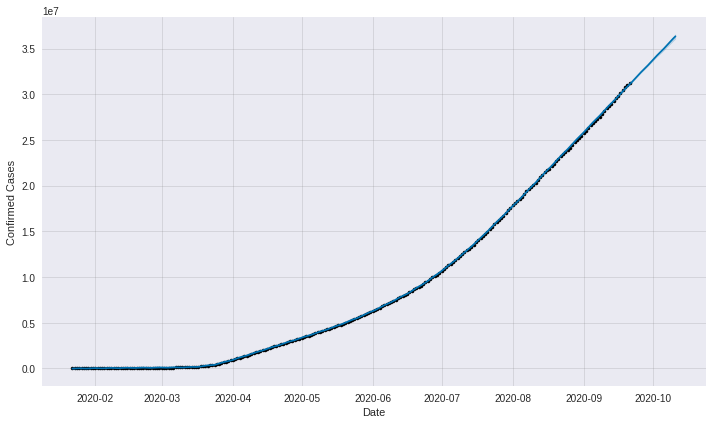

In [155]:
figure = m.plot(forecast_prophet, xlabel = 'Date', ylabel = 'Confirmed Cases')

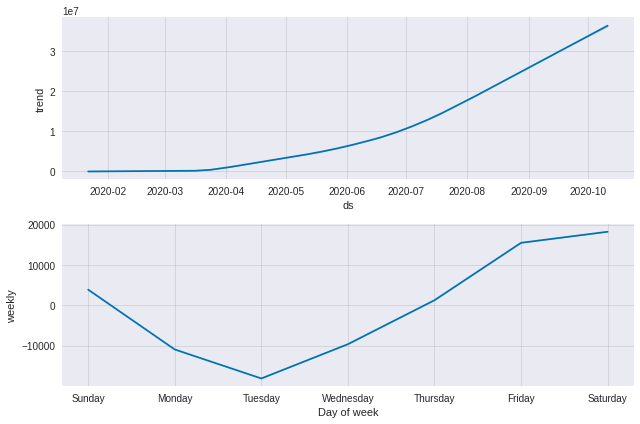

In [156]:
figure2 = m.plot_components(forecast_prophet)

Prophet Model for Recovered Cases

In [157]:
df_prophet1 = df_group[['Recovered']]
df_prophet1 = df_prophet1.reset_index()
df_prophet1 = df_prophet1.rename(columns = {'ds': 'ds', 'Recovered': 'y'})
df_prophet1['ds'] = pd.to_datetime(df_prophet1['ds'])
m1 = Prophet()
m1.fit(df_prophet1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [158]:
future_prophet_recovered = m1.make_future_dataframe(periods = 20)
forecast_prophet_recovered = m1.predict(future_prophet_recovered)
model_scores.append(np.sqrt(mean_squared_error(df_group["Recovered"],forecast_prophet_recovered['yhat'].head(df_group.shape[0]))))
print("Root Mean Squared Error for Prophet Model for Recoveries: ",np.sqrt(mean_squared_error(df_group["Recovered"],forecast_prophet_recovered['yhat'].head(df_group.shape[0]))))

Root Mean Squared Error for Prophet Model for Recoveries:  23919.144532994458


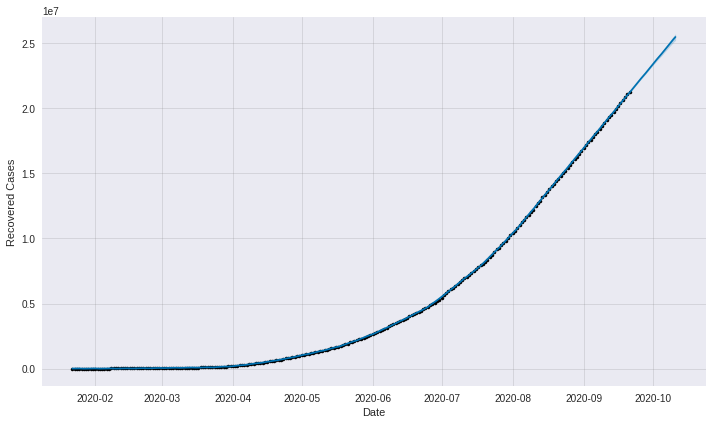

In [159]:
figure_recovered = m1.plot(forecast_prophet_recovered, xlabel = 'Date', ylabel = 'Recovered Cases')

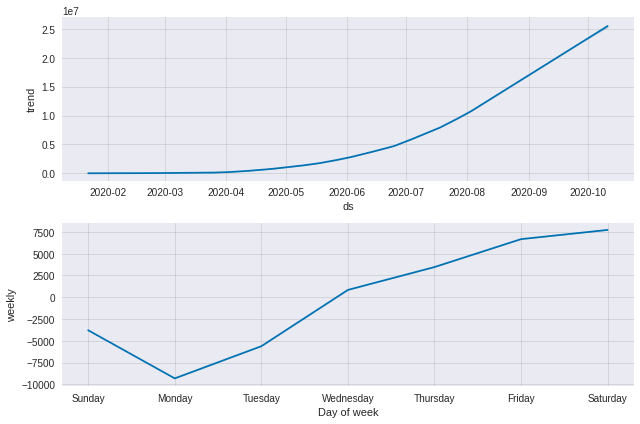

In [160]:
figure_recovered2 = m1.plot_components(forecast_prophet_recovered)

Prophet Model for Deaths

In [161]:
df_prophet2 = df_group[['Deaths']]
df_prophet2 = df_prophet2.reset_index()
df_prophet2 = df_prophet2.rename(columns = {'ds': 'ds', 'Deaths': 'y'})
df_prophet2['ds'] = pd.to_datetime(df_prophet2['ds'])
m2 = Prophet()
m2.fit(df_prophet2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [162]:
future_prophet_deaths = m2.make_future_dataframe(periods = 20)
forecast_prophet_deaths = m2.predict(future_prophet_deaths)
model_scores.append(np.sqrt(mean_squared_error(df_group["Deaths"],forecast_prophet_deaths['yhat'].head(df_group.shape[0]))))
print("Root Mean Squared Error for Prophet Model for Recoveries: ",np.sqrt(mean_squared_error(df_group["Deaths"],forecast_prophet_deaths['yhat'].head(df_group.shape[0]))))

Root Mean Squared Error for Prophet Model for Recoveries:  1225.270206136792


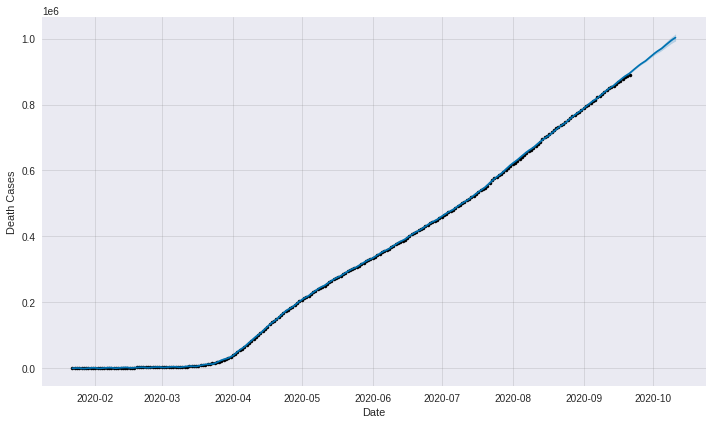

In [163]:
figure_deaths = m2.plot(forecast_prophet_deaths, xlabel = 'Date', ylabel = 'Death Cases')

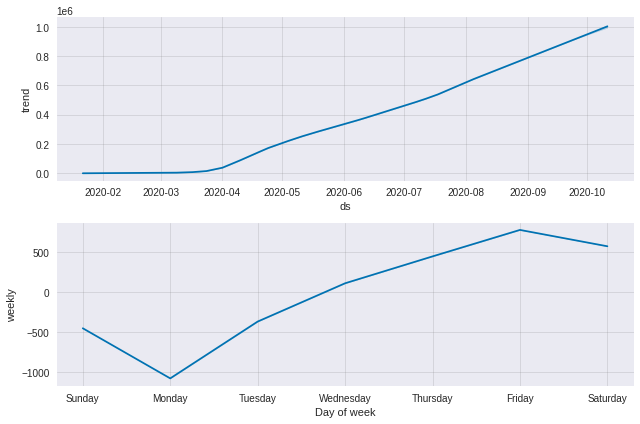

In [164]:
figure_deaths2 = m2.plot_components(forecast_prophet_deaths)

**Support** **Vector** **Regression** **and** **Polynomial** **Regression** 

In [165]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [166]:
cols=recovered_df.keys()
recovered_cases=recovered_df.loc[:,cols[4]:cols[-1]]
world_cases=[]
for i in dates:
    recovered_sum=recovered_cases[i].sum()
    world_cases.append(recovered_sum)

In [167]:
#Convert all dates and cases in the form of numpy array
day_since_1_jan=np.array([j for j in range(len(dates))]).reshape(-1,1)
world_cases=np.array(world_cases).reshape(-1,1)

In [168]:
#Future forecast for the next 10 days 
day_future=10
future_forecast=np.array([j for j in range(len(dates)+day_future)]).reshape(-1,1)
adjusted_date=future_forecast[:-10]

In [169]:
#Convert all integers into datetime for better visualization
start="1/22/2020"
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# Train-Test-Split

In [170]:
X_train_recovered,X_test_recovered,y_train_recovered,y_test_recovered=train_test_split(day_since_1_jan,world_cases,test_size=0.25,shuffle=False)

# Support Vector Regression Model

In [171]:
from sklearn.svm import SVR
svm_recovered=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5,C=0.1)
svm_recovered.fit(X_train_recovered,y_train_recovered)
svm_pred=svm_recovered.predict(future_forecast)

Mean Absolute Error : 8506513.514359016
Mean Squared Error : 104704959956200.11


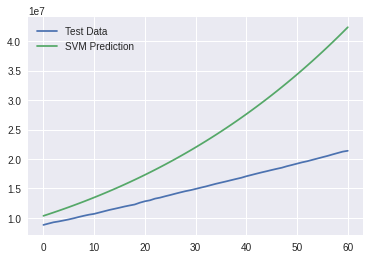

In [172]:
svm_test_pred=svm_recovered.predict(X_test_recovered)
plt.plot(y_test_recovered)
plt.plot(svm_test_pred)
plt.legend(['Test Data','SVM Prediction'])
print("Mean Absolute Error :", mean_absolute_error(svm_test_pred,y_test_recovered))
print("Mean Squared Error :", mean_squared_error(svm_test_pred,y_test_recovered))

In [173]:
#SVM Prediction for the next 10 days 
print("SVM future Prediction for recoveries")
svm_pred=svm_pred.reshape(1,-1)[0]
poly_df1=pd.DataFrame({'Date':future_forecast_dates[-10:], 'Predicted no of  Recovered Cases':np.round(svm_pred[-10:])})
poly_df1

SVM future Prediction for recoveries


,Date,Predicted no of Recovered Cases
0,09/22/2020,43243125.000
1,09/23/2020,44134071.000
2,09/24/2020,45039681.000
3,09/25/2020,45960138.000
4,09/26/2020,46895622.000
5,09/27/2020,47846316.000
6,09/28/2020,48812407.000
7,09/29/2020,49794078.000
8,09/30/2020,50791520.000
9,10/01/2020,51804920.000


In [174]:
def plot_prediction(x,y,pred,algo_name,color):
    plt.figure(figsize=(15,8))
    plt.plot(x,y)
    plt.plot(future_forecast,svm_pred,linestyle='dashed',color=color)
    plt.title("No of Corona Virus Cases over time ",fontsize=20)
    plt.xlabel("Days since 01/22/2020 ",fontsize=20)
    plt.ylabel("No of Cases ",fontsize=20)
    plt.legend(['Recovered cases',algo_name],prop={'size':20})
    plt.xticks(size=18)
    plt.yticks(size=18)
    plt.show()

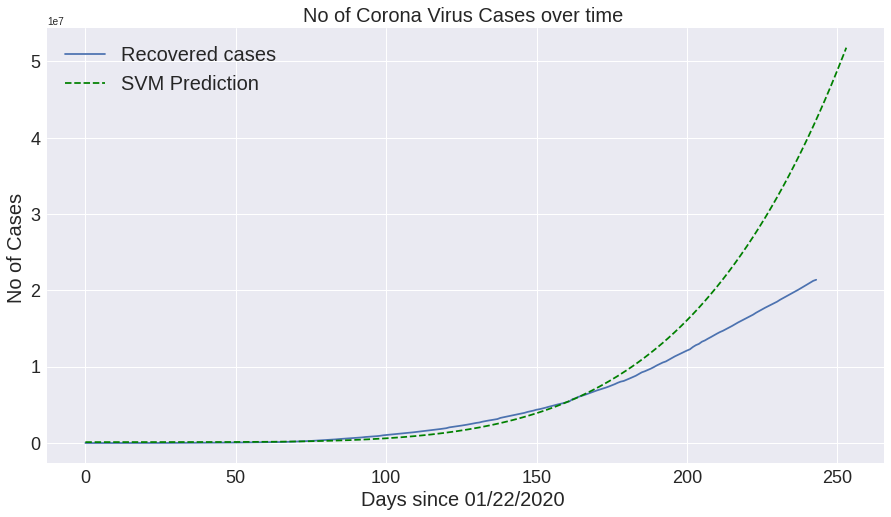

In [175]:
plot_prediction(adjusted_date,world_cases,svm_pred,'SVM Prediction','green')

# Polynomial Regression for Recoveries

In [176]:
poly=PolynomialFeatures(degree=3)
poly_X_train_recovered=poly.fit_transform(X_train_recovered)
poly_X_test_recovered=poly.fit_transform(X_test_recovered)
poly_future_forecast=poly.fit_transform(future_forecast)

In [177]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=True,fit_intercept=False)
linear_model.fit(poly_X_train_recovered,y_train_recovered)
test_linear_pred=linear_model.predict(poly_X_test_recovered)
linear_pred=linear_model.predict(poly_future_forecast)
print("Mean Absolute Error :", mean_absolute_error(test_linear_pred,y_test_recovered))
print("Mean Squared Error :", mean_squared_error(test_linear_pred,y_test_recovered))

Mean Absolute Error : 370047.38301837497
Mean Squared Error : 260785530077.5861


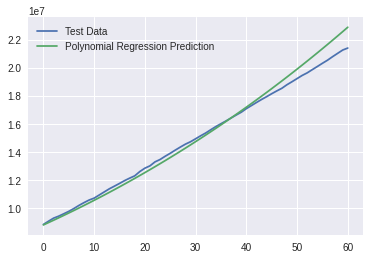

In [178]:
plt.plot(y_test_recovered)
plt.plot(test_linear_pred)
plt.legend(['Test Data','Polynomial Regression Prediction'])

In [179]:
#Linear Prediction for the next 10 days 
print("Linear future Prediction")
linear_pred=linear_pred.reshape(1,-1)[0]
poly_df=pd.DataFrame({'Date':future_forecast_dates[-10:], 'Predicted no of Cases':np.round(linear_pred[-10:])})
poly_df

Linear future Prediction


,Date,Predicted no of Cases
0,09/22/2020,23192610.000
1,09/23/2020,23509738.000
2,09/24/2020,23829749.000
3,09/25/2020,24152655.000
4,09/26/2020,24478471.000
5,09/27/2020,24807208.000
6,09/28/2020,25138881.000
7,09/29/2020,25473502.000
8,09/30/2020,25811084.000
9,10/01/2020,26151640.000


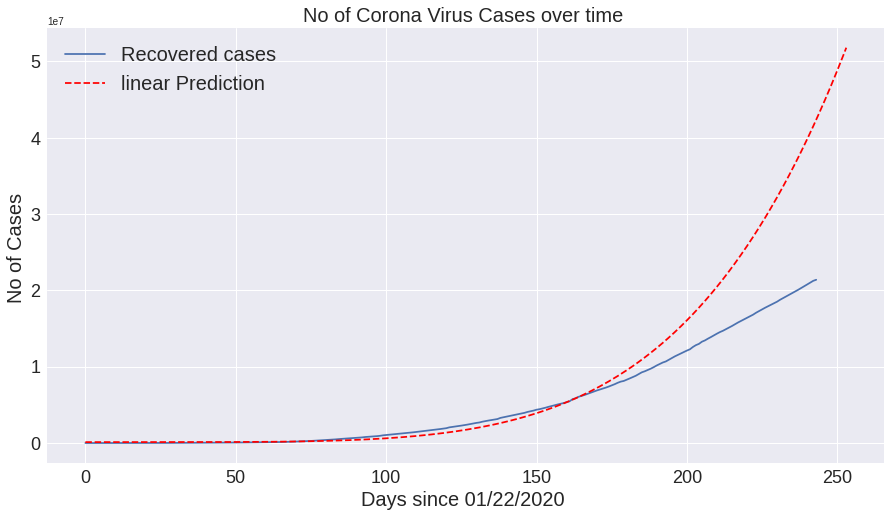

In [180]:
plot_prediction(adjusted_date,world_cases,linear_pred,'linear Prediction','red')

SVR and Polynomial for Death Cases

In [181]:
cols1=death_df.keys()
death_cases=death_df.loc[:,cols[4]:cols[-1]]
death_world_cases=[]
for i in dates:
    death_sum=death_cases[i].sum()
    death_world_cases.append(death_sum)
#Convert all dates and cases in the form of numpy array
day_since_1_jan=np.array([j for j in range(len(dates))]).reshape(-1,1)
death_world_cases=np.array(death_world_cases).reshape(-1,1)   
#Future forecast for the next 10 days 
day_future=10
future_forecast=np.array([j for j in range(len(dates)+day_future)]).reshape(-1,1)
adjusted_date=future_forecast[:-10]
#Convert all integers into datetime for better visualization
start="1/22/2020"
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [182]:
#Train-Test-Split
X_train_death,X_test_death,y_train_death,y_test_death=train_test_split(day_since_1_jan,death_world_cases,test_size=0.25,shuffle=False)

### SVR Model(deaths)

In [183]:
svm_death=SVR(shrinking=True,kernel='poly',gamma=0.01,epsilon=1,degree=5,C=0.1)
svm_death.fit(X_train_death,y_train_death)
svm_pred_death=svm_death.predict(future_forecast)

Mean Absolute Error : 1176237.1531541022
Mean Squared Error : 1837798682704.5432


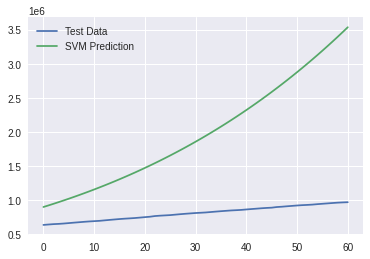

In [184]:
svm_test_pred1=svm_death.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(svm_test_pred1)
plt.legend(['Test Data','SVM Prediction'])
print("Mean Absolute Error :", mean_absolute_error(svm_test_pred1,y_test_death))
print("Mean Squared Error :", mean_squared_error(svm_test_pred1,y_test_death))

In [185]:
#SVM Prediction for the next 10 days 
print("SVM future Prediction")
svm_pred_death=svm_pred_death.reshape(1,-1)[0]
poly_df2=pd.DataFrame({'Date':future_forecast_dates[-10:], 'Predicted no of Cases':np.round(svm_pred_death[-10:])})
poly_df2

SVM future Prediction


,Date,Predicted no of Cases
0,09/22/2020,3607762.000
1,09/23/2020,3681295.000
2,09/24/2020,3756039.000
3,09/25/2020,3832008.000
4,09/26/2020,3909218.000
5,09/27/2020,3987683.000
6,09/28/2020,4067418.000
7,09/29/2020,4148440.000
8,09/30/2020,4230763.000
9,10/01/2020,4314403.000


Polynomil Regression(Death)

In [186]:
poly=PolynomialFeatures(degree=3)
poly_X_train_death=poly.fit_transform(X_train_death)
poly_X_test_death=poly.fit_transform(X_test_death)
poly_future_forecast_death=poly.fit_transform(future_forecast)

In [187]:
linear_model1=LinearRegression(normalize=True,fit_intercept=False)
linear_model1.fit(poly_X_train_death,y_train_death)
test_linear_pred_death=linear_model1.predict(poly_X_test_death)
linear_pred1=linear_model1.predict(poly_future_forecast_death)
print("Mean Absolute Error :", mean_absolute_error(test_linear_pred_death,y_test_death))
print("Mean Squared Error :", mean_squared_error(test_linear_pred_death,y_test_death))

Mean Absolute Error : 197043.98072437762
Mean Squared Error : 52541722199.55035


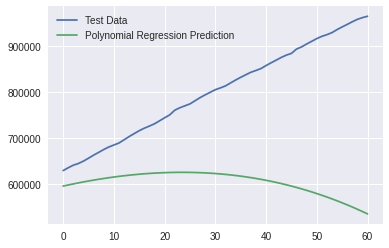

In [188]:
plt.plot(y_test_death)
plt.plot(test_linear_pred_death)
plt.legend(['Test Data','Polynomial Regression Prediction'])

In [189]:
#Linear Prediction for the next 10 days 
print("Linear future Prediction")
linear_pred1=linear_pred1.reshape(1,-1)[0]
poly_df3=pd.DataFrame({'Date':future_forecast_dates[-10:], 'Predicted no of Cases':np.round(linear_pred1[-10:])})
poly_df3

Linear future Prediction


,Date,Predicted no of Cases
0,09/22/2020,530665.000
1,09/23/2020,525198.000
2,09/24/2020,519563.000
3,09/25/2020,513756.000
4,09/26/2020,507778.000
5,09/27/2020,501627.000
6,09/28/2020,495301.000
7,09/29/2020,488799.000
8,09/30/2020,482120.000
9,10/01/2020,475262.000


# LSTM Model

In [190]:
country = "US"

In [191]:
df_confirmed_country=confirmed_df[confirmed_df["Country/Region"] == country]
df_recovered_country=recovered_df[recovered_df["Country/Region"] == country]
df_deaths_country=death_df[death_df["Country/Region"] == country]

In [192]:
df_confirmed_country = pd.DataFrame(df_confirmed_country[df_confirmed_country.columns[4:]].sum(),columns=["confirmed"])
df_confirmed_country.index = pd.to_datetime(df_confirmed_country.index,format='%m/%d/%y')

In [193]:
df_recovered_country = pd.DataFrame(df_recovered_country[df_recovered_country.columns[4:]].sum(),columns=["recovered"])
df_recovered_country.index = pd.to_datetime(df_recovered_country.index,format='%m/%d/%y')

In [194]:
df_deaths_country = pd.DataFrame(df_deaths_country[df_deaths_country.columns[4:]].sum(),columns=["deaths"])
df_deaths_country.index = pd.to_datetime(df_deaths_country.index,format='%m/%d/%y')

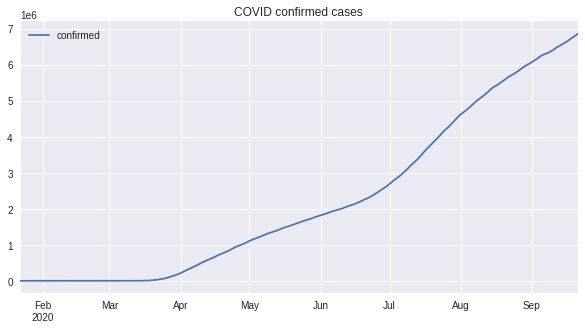

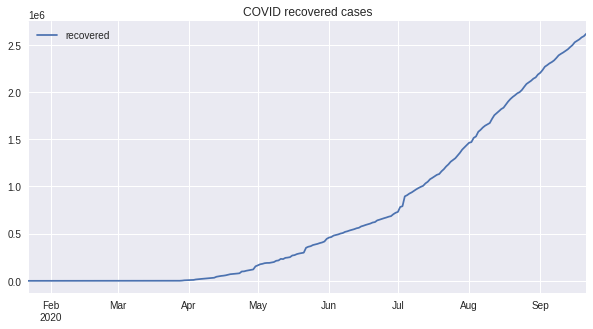

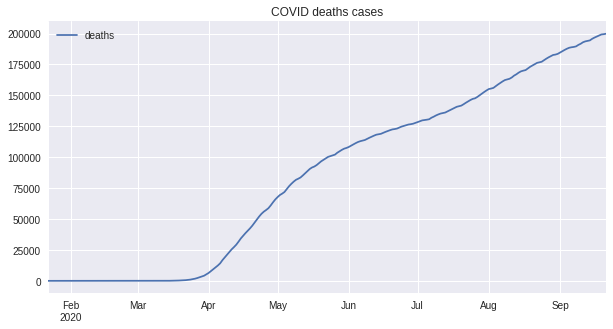

In [195]:
df_confirmed_country.plot(figsize=(10,5),title="COVID confirmed cases")
df_recovered_country.plot(figsize=(10,5),title="COVID recovered cases")
df_deaths_country.plot(figsize=(10,5),title="COVID deaths cases")

In [196]:
df_confirmed_country.tail(5)

,confirmed
2020-09-17,6674411
2020-09-18,6723933
2020-09-19,6768119
2020-09-20,6804814
2020-09-21,6856884


In [197]:
print("Total days in the dataset", len(df_confirmed_country))
print("Total days in the dataset", len(df_recovered_country))
print("Total days in the dataset", len(df_deaths_country))

Total days in the dataset 244
Total days in the dataset 244
Total days in the dataset 244


### Prediction for Confirmed cases:

In [198]:
#Use data until 14 days before as training: (80:20 ratio)
x = len(df_confirmed_country)-14

In [199]:
train=df_confirmed_country.iloc[:x]
test = df_confirmed_country.iloc[x:]

In [200]:
##scale or normalize data as the data is too skewed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train) 

MinMaxScaler(copy=True, feature_range=(0, 1))

In [201]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [202]:
import tensorflow as tf
from tensorflow import keras

In [203]:
# Use TimeSeriestrain_generator to generate data in sequences.
#Alternatively we can create our own sequences. 
from keras.preprocessing.sequence import TimeseriesGenerator

In [204]:
#Sequence size has an impact on prediction, especially since COVID is unpredictable!
seq_size = 7  ## number of steps (lookback)
n_features = 1 ## number of features. This dataset is univariate so it is 1
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length = seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(train)) 
print("Total number of samples in the generated data = ", len(train_generator))

Total number of samples in the original training data =  230
Total number of samples in the generated data =  223


In [205]:
#Check data shape from generator
x,y = train_generator[10]  #Check train_generator
#Takes 7 days as x and 8th day as y (for seq_size=7)

In [206]:
#Also generate test data
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(test)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator)) # 7
#Check data shape from generator
x,y = test_generator[0]

Total number of samples in the original training data =  14
Total number of samples in the generated data =  7


In [207]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

In [208]:
#Define Model 
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [209]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 150)            91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________


In [210]:
history = model.fit_generator(train_generator, 
                              validation_data=test_generator, 
                              epochs=50, steps_per_epoch=10)

Epoch 1/50
10/10 [==============================] - 3s 112ms/step - loss: 0.1760 - val_loss: 0.3492
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0700 - val_loss: 0.0011
Epoch 3/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0283 - val_loss: 0.1159
Epoch 4/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0252 - val_loss: 0.4675
Epoch 5/50
10/10 [==============================] - 0s 17ms/step - loss: 0.0283 - val_loss: 0.0513
Epoch 6/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0239 - val_loss: 0.0413
Epoch 7/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0025 - val_loss: 0.0237
Epoch 8/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0038 - val_loss: 1.3262e-05
Epoch 9/50
10/10 [==============================] - 0s 17ms/step - loss: 0.0016 - val_loss: 0.0981
Epoch 10/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0047 - val_loss: 0.0215
Epoc

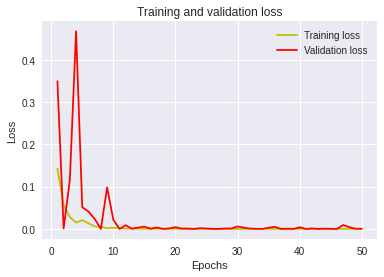

In [211]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [212]:
#forecast
prediction = [] #Empty list to populate later with predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

In [213]:
## Predict future, beyond test dates
future = 10 #Days
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [214]:
### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test.index  #Get dates for test data

In [215]:
#Add new dates for the forecast period
for k in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

In [216]:
#Create a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["actual_confirmed","predicted"], index=time_series_array)

df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"actual_confirmed"] = test["confirmed"]

In [217]:
df_forecast

,actual_confirmed,predicted
2020-09-08,6327009.000,6441225.024
2020-09-09,6360212.000,6491407.019
2020-09-10,6396100.000,6546842.907
2020-09-11,6443652.000,6606956.600
2020-09-12,6485123.000,6669830.558
2020-09-13,6520122.000,6736471.244
2020-09-14,6553652.000,6809285.912
2020-09-15,6592342.000,6890153.794
2020-09-16,6630051.000,6958820.928
2020-09-17,6674411.000,7031625.832


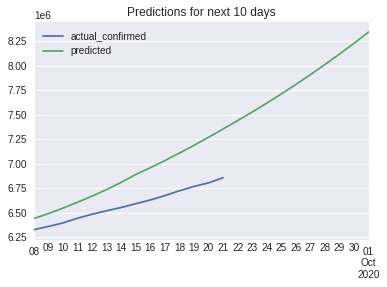

In [218]:
df_forecast.plot(title="Predictions for next 10 days")

### Prediction for Recovered Cases:

In [219]:
j= len(df_recovered_country)-14
train1=df_recovered_country.iloc[:j]
test1 = df_recovered_country.iloc[j:]
scaler1 = MinMaxScaler()
scaler1.fit(train) 
train_scaled1 = scaler.transform(train1)
test_scaled1 = scaler.transform(test1)
seq_size1 = 7  ## number of steps (lookback)
n_features1 = 1 ## number of features. This dataset is univariate so it is 1
train_generator1 = TimeseriesGenerator(train_scaled1, train_scaled1, length = seq_size1, batch_size=1)
print("Total number of samples in the original training data = ", len(train1)) 
print("Total number of samples in the generated data = ", len(train_generator1))

Total number of samples in the original training data =  230
Total number of samples in the generated data =  223


In [220]:
#Check data shape from generator
x1,y1 = train_generator1[10]
#Also generate test data
test_generator1 = TimeseriesGenerator(test_scaled1, test_scaled1, length=seq_size1, batch_size=1)
print("Total number of samples in the original training data = ", len(test1)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator1)) # 7

Total number of samples in the original training data =  14
Total number of samples in the generated data =  7


In [221]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_size1, n_features1)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [222]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 7, 150)            91200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________


In [223]:
history = model.fit_generator(train_generator1, 
                              validation_data=test_generator1, 
                              epochs=50, steps_per_epoch=10)

Epoch 1/50
10/10 [==============================] - 3s 56ms/step - loss: 0.0176 - val_loss: 0.0476
Epoch 2/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0110 - val_loss: 0.0359
Epoch 3/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0054 - val_loss: 0.0736
Epoch 4/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0097 - val_loss: 0.0383
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0058 - val_loss: 0.0012
Epoch 6/50
10/10 [==============================] - 0s 16ms/step - loss: 8.5859e-04 - val_loss: 3.5572e-04
Epoch 7/50
10/10 [==============================] - 0s 16ms/step - loss: 0.0026 - val_loss: 3.8195e-04
Epoch 8/50
10/10 [==============================] - 0s 16ms/step - loss: 3.6180e-04 - val_loss: 0.0152
Epoch 9/50
10/10 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 2.2976e-04
Epoch 10/50
10/10 [==============================] - 0s 16ms/step - loss: 7.3619e-04 - va

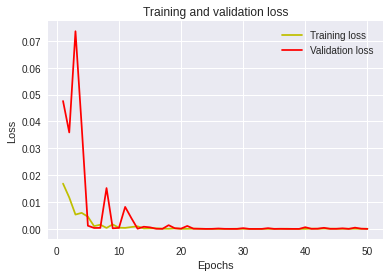

In [224]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [225]:
#forecast
prediction = [] #Empty list to populate later with predictions

current_batch = train_scaled1[-seq_size1:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size1, n_features1) #Reshape
## Predict future, beyond test dates
future = 10 #Days
for i in range(len(test1) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test1.index  #Get dates for test data  
for k in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

In [226]:
#Create a dataframe to capture the forecast data
df_forecast_recovered = pd.DataFrame(columns=["actual_recovered","predicted"], index=time_series_array)

df_forecast_recovered.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast_recovered.loc[:,"actual_recovered"] = test1["recovered"]

In [227]:
df_forecast_recovered

,actual_recovered,predicted
2020-09-08,2359111.000,2356714.244
2020-09-09,2387479.000,2377844.731
2020-09-10,2403511.000,2397461.015
2020-09-11,2417878.000,2414633.432
2020-09-12,2434658.000,2432223.080
2020-09-13,2451406.000,2449814.419
2020-09-14,2474570.000,2468104.837
2020-09-15,2495127.000,2486468.674
2020-09-16,2525573.000,2504014.572
2020-09-17,2540334.000,2521046.159


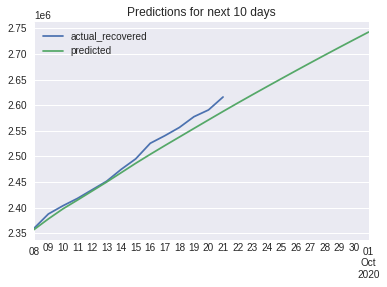

In [228]:
df_forecast_recovered.plot(title="Predictions for next 10 days")

In [229]:
k= len(df_deaths_country)-14
train2=df_deaths_country.iloc[:k]
test2= df_deaths_country.iloc[k:]
scaler2 = MinMaxScaler()
scaler2.fit(train) 
train_scaled2 = scaler.transform(train2)
test_scaled2 = scaler.transform(test2)
seq_size2 = 7  ## number of steps (lookback)
n_features2 = 1 ## number of features. This dataset is univariate so it is 1
train_generator2 = TimeseriesGenerator(train_scaled2, train_scaled2, length = seq_size2, batch_size=1)
print("Total number of samples in the original training data = ", len(train2)) 
print("Total number of samples in the generated data = ", len(train_generator2))

Total number of samples in the original training data =  230
Total number of samples in the generated data =  223


In [230]:
#Check data shape from generator
x2,y2 = train_generator2[10]
#Also generate test data
test_generator2 = TimeseriesGenerator(test_scaled2, test_scaled2, length=seq_size2, batch_size=1)
print("Total number of samples in the original training data = ", len(test2)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator2)) # 7

Total number of samples in the original training data =  14
Total number of samples in the generated data =  7


In [231]:
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_size2, n_features2)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [232]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 150)            91200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________


In [233]:
history = model.fit_generator(train_generator2, 
                              validation_data=test_generator2, 
                              epochs=50, steps_per_epoch=10)

Epoch 1/50
10/10 [==============================] - 3s 55ms/step - loss: 5.4861e-05 - val_loss: 1.5979e-04
Epoch 2/50
10/10 [==============================] - 0s 15ms/step - loss: 7.4877e-05 - val_loss: 9.8413e-05
Epoch 3/50
10/10 [==============================] - 0s 17ms/step - loss: 6.3030e-05 - val_loss: 1.4400e-04
Epoch 4/50
10/10 [==============================] - 0s 16ms/step - loss: 1.2618e-04 - val_loss: 4.3928e-05
Epoch 5/50
10/10 [==============================] - 0s 15ms/step - loss: 1.2140e-04 - val_loss: 8.0652e-04
Epoch 6/50
10/10 [==============================] - 0s 15ms/step - loss: 2.3654e-04 - val_loss: 7.5463e-06
Epoch 7/50
10/10 [==============================] - 0s 19ms/step - loss: 6.1225e-05 - val_loss: 3.9902e-04
Epoch 8/50
10/10 [==============================] - 0s 15ms/step - loss: 1.0041e-04 - val_loss: 9.0150e-05
Epoch 9/50
10/10 [==============================] - 0s 16ms/step - loss: 1.0783e-04 - val_loss: 1.9382e-04
Epoch 10/50
10/10 [==================

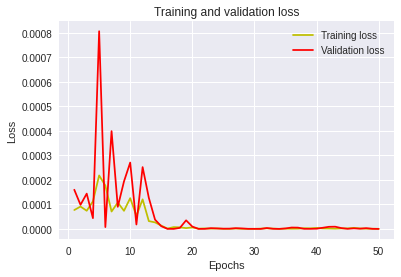

In [234]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [235]:
#forecast
prediction = [] #Empty list to populate later with predictions

current_batch = train_scaled2[-seq_size2:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size2, n_features2) #Reshape
## Predict future, beyond test dates
future = 10 #Days
for i in range(len(test2) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test2.index  #Get dates for test data  
for g in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

In [236]:
#Create a dataframe to capture the forecast data
df_forecast_deaths = pd.DataFrame(columns=["actual_Death","predicted"], index=time_series_array)

df_forecast_deaths.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast_deaths.loc[:,"actual_Death"] = test2["deaths"]

In [237]:
df_forecast_deaths

,actual_Death,predicted
2020-09-08,189653.000,192404.553
2020-09-09,190859.000,193020.895
2020-09-10,191766.000,193623.706
2020-09-11,192979.000,194186.122
2020-09-12,193693.000,194766.446
2020-09-13,194071.000,195371.615
2020-09-14,194493.000,196008.730
2020-09-15,195781.000,196685.816
2020-09-16,196763.000,197019.923
2020-09-17,197633.000,197343.292


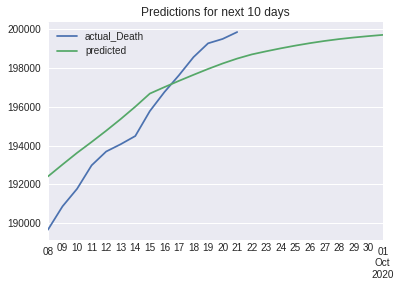

In [238]:
df_forecast_deaths.plot(title="Predictions for next 10 days")